In [1]:
# Libraries
import os
import re
import time
import fnmatch
import numpy as np
import pandas as pd
import warnings
from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')
# import mysql.connector
import matplotlib.pyplot as plt
df = pd.read_csv('zurich.csv', sep=',', encoding='utf-8')

In [2]:
print(df)
df.dtypes

    web-scraper-order                              web-scraper-start-url  \
0      1671628590-151  https://www.autolina.ch/carList/page/50?region=ZH   
1      1671628590-152  https://www.autolina.ch/carList/page/50?region=ZH   
2      1671628590-153  https://www.autolina.ch/carList/page/50?region=ZH   
3      1671628590-154  https://www.autolina.ch/carList/page/50?region=ZH   
4      1671628590-155  https://www.autolina.ch/carList/page/50?region=ZH   
..                ...                                                ...   
745    1671628755-896   https://www.autolina.ch/carList/page/1?region=ZH   
746    1671628755-897   https://www.autolina.ch/carList/page/1?region=ZH   
747    1671628755-898   https://www.autolina.ch/carList/page/1?region=ZH   
748    1671628755-899   https://www.autolina.ch/carList/page/1?region=ZH   
749    1671628755-900   https://www.autolina.ch/carList/page/1?region=ZH   

         brand_raw  year_raw   km_raw  ps_raw               place_raw  \
0             

web-scraper-order         object
web-scraper-start-url     object
brand_raw                 object
year_raw                 float64
km_raw                    object
ps_raw                   float64
place_raw                 object
price_raw                 object
modell_raw                object
gear_raw                  object
fuel_raw                  object
dtype: object

In [3]:
df=df.astype({'km_raw':'string'})
df['price_raw']=df['price_raw'].str.replace("'", "")
df['km_raw']=df['km_raw'].str.replace("'", "")
print(df)

    web-scraper-order                              web-scraper-start-url  \
0      1671628590-151  https://www.autolina.ch/carList/page/50?region=ZH   
1      1671628590-152  https://www.autolina.ch/carList/page/50?region=ZH   
2      1671628590-153  https://www.autolina.ch/carList/page/50?region=ZH   
3      1671628590-154  https://www.autolina.ch/carList/page/50?region=ZH   
4      1671628590-155  https://www.autolina.ch/carList/page/50?region=ZH   
..                ...                                                ...   
745    1671628755-896   https://www.autolina.ch/carList/page/1?region=ZH   
746    1671628755-897   https://www.autolina.ch/carList/page/1?region=ZH   
747    1671628755-898   https://www.autolina.ch/carList/page/1?region=ZH   
748    1671628755-899   https://www.autolina.ch/carList/page/1?region=ZH   
749    1671628755-900   https://www.autolina.ch/carList/page/1?region=ZH   

         brand_raw  year_raw  km_raw  ps_raw               place_raw  \
0              

In [4]:
#DF Bereinigen
df=df.dropna()
df=df.astype({'price_raw':'int'})
df=df.astype({'ps_raw':'int'})
df=df.astype({'km_raw':'int'})
print(df)

    web-scraper-order                              web-scraper-start-url  \
2      1671628590-153  https://www.autolina.ch/carList/page/50?region=ZH   
3      1671628590-154  https://www.autolina.ch/carList/page/50?region=ZH   
4      1671628590-155  https://www.autolina.ch/carList/page/50?region=ZH   
5      1671628590-156  https://www.autolina.ch/carList/page/50?region=ZH   
6      1671628590-157  https://www.autolina.ch/carList/page/50?region=ZH   
..                ...                                                ...   
745    1671628755-896   https://www.autolina.ch/carList/page/1?region=ZH   
746    1671628755-897   https://www.autolina.ch/carList/page/1?region=ZH   
747    1671628755-898   https://www.autolina.ch/carList/page/1?region=ZH   
748    1671628755-899   https://www.autolina.ch/carList/page/1?region=ZH   
749    1671628755-900   https://www.autolina.ch/carList/page/1?region=ZH   

         brand_raw  year_raw  km_raw  ps_raw               place_raw  \
2    MERCEDES-B

In [5]:
#DF nach ZH filtern
df_clean=df[["brand_raw","year_raw", "km_raw","ps_raw","place_raw","price_raw"]]
df_zh=df_clean[df_clean['place_raw'].str.contains("ZH")]
df_zh=df_zh.drop_duplicates()
print(df_zh)

         brand_raw  year_raw  km_raw  ps_raw               place_raw  \
2    MERCEDES-BENZ    2015.0   93500     333  8317 Tagelswangen / ZH   
3           TOYOTA    2010.0   90100      90   8903 Birmensdorf / ZH   
4              BMW    2017.0   84700     190  8317 Tagelswangen / ZH   
5            VOLVO    2018.0   86006     250  8317 Tagelswangen / ZH   
6             SEAT    2016.0   89579     180  8317 Tagelswangen / ZH   
..             ...       ...     ...     ...                     ...   
745  MERCEDES-BENZ    2020.0   37500     163        8340 Hinwil / ZH   
746            BMW    2015.0  162800     190        8340 Hinwil / ZH   
747           FIAT    2015.0    4900      95        8340 Hinwil / ZH   
748  MERCEDES-BENZ    2019.0   38600     476        8340 Hinwil / ZH   
749            BMW    2016.0   65500     449     8154 Oberglatt / ZH   

     price_raw  
2        29999  
3         7800  
4        24500  
5        37500  
6        17500  
..         ...  
745      44900  

In [6]:
df_zh.describe()

,year_raw,km_raw,ps_raw,price_raw
count,615.000000,615.000000,615.000000,615.000000
mean,2016.580488,66153.674797,215.128455,39582.377236
std,6.960307,58237.955707,113.358709,36285.352770
min,1955.000000,0.000000,60.000000,1900.000000
25%,2015.000000,18962.000000,140.000000,18935.000000
50%,2018.000000,54500.000000,190.000000,29900.000000
75%,2021.000000,98000.000000,258.000000,49850.000000
max,2023.000000,438500.000000,680.000000,395000.000000


In [7]:
df_zh=df_zh.assign(Price_per_ps=df_zh["price_raw"]/df_zh["ps_raw"])

In [8]:
df_zh=df_zh.assign(km_per_year=df_zh["km_raw"]/(2023-df_zh["year_raw"]))

In [9]:
df_numeric=df_zh[["year_raw", "km_raw","ps_raw","price_raw","km_per_year","Price_per_ps"]]
print(df_numeric)

     year_raw  km_raw  ps_raw  price_raw   km_per_year  Price_per_ps
2      2015.0   93500     333      29999  11687.500000     90.087087
3      2010.0   90100      90       7800   6930.769231     86.666667
4      2017.0   84700     190      24500  14116.666667    128.947368
5      2018.0   86006     250      37500  17201.200000    150.000000
6      2016.0   89579     180      17500  12797.000000     97.222222
..        ...     ...     ...        ...           ...           ...
745    2020.0   37500     163      44900  12500.000000    275.460123
746    2015.0  162800     190      18900  20350.000000     99.473684
747    2015.0    4900      95      12900    612.500000    135.789474
748    2019.0   38600     476      79900   9650.000000    167.857143
749    2016.0   65500     449      57900   9357.142857    128.953229

[615 rows x 6 columns]


In [10]:
corr = df_numeric.corr()
corr

,year_raw,km_raw,ps_raw,price_raw,km_per_year,Price_per_ps
year_raw,1.000000,-0.444013,0.137609,0.156541,0.091576,0.062477
km_raw,-0.444013,1.000000,-0.109907,-0.416892,0.579728,-0.480491
ps_raw,0.137609,-0.109907,1.000000,0.664530,0.007007,0.028903
price_raw,0.156541,-0.416892,0.664530,1.000000,-0.188468,0.611108
km_per_year,0.091576,0.579728,0.007007,-0.188468,1.000000,-0.240335
Price_per_ps,0.062477,-0.480491,0.028903,0.611108,-0.240335,1.000000


# The horsepower and price correlate the most with each other. The least correlation has horsepower and year. 

In [11]:
cov = df_numeric.cov()
cov



,year_raw,km_raw,ps_raw,price_raw,km_per_year,Price_per_ps
year_raw,48.445873,-1.799826e+05,1.085751e+02,3.953548e+04,NaN,5.701953e+01
km_raw,-179982.643164,3.391659e+09,-7.255785e+05,-8.809698e+08,NaN,-3.669149e+06
ps_raw,108.575149,-7.255785e+05,1.285020e+04,2.733385e+06,NaN,4.296099e+02
price_raw,39535.482617,-8.809698e+08,2.733385e+06,1.316627e+09,NaN,2.907523e+06
km_per_year,NaN,NaN,NaN,NaN,NaN,NaN
Price_per_ps,57.019532,-3.669149e+06,4.296099e+02,2.907523e+06,NaN,1.719284e+04


# The strongest negative covariance has kilometers and year. That means the more kilometers a car has the less expensive it is. 


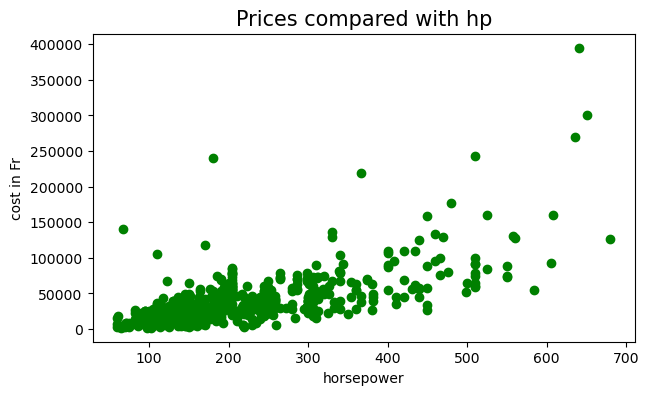

In [12]:
x= df['ps_raw']
y= df['price_raw']

fig = plt.figure(figsize=(7,4))
plt.scatter(x, y, color="green")
plt.title('Prices compared with hp', fontsize=15)
plt.xlabel('horsepower', fontsize=10)
plt.ylabel('cost in Fr', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.ylim([0,200000])
plt.show()

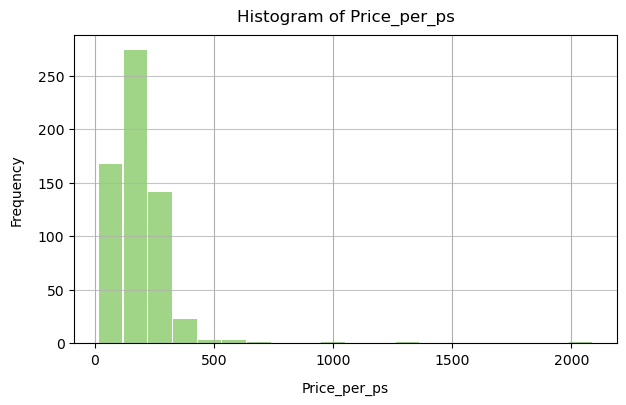

In [13]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df_numeric['Price_per_ps'], 
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Price_per_ps', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of Price_per_ps', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

#was?

# Scatterplot

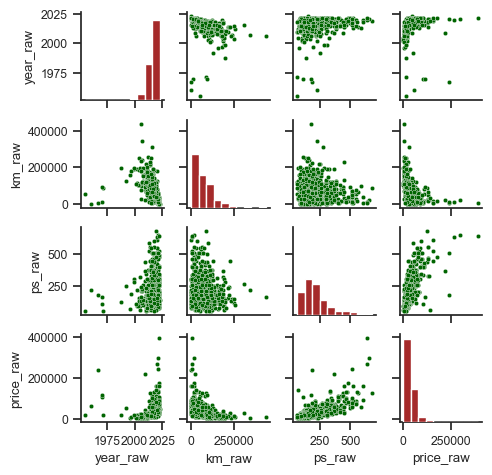

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['year_raw', 
                     'km_raw', 
                     'ps_raw', 
                     'price_raw']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

In [15]:
# Low cost cars
df[df.price_raw <= 8000].head()

,web-scraper-order,web-scraper-start-url,brand_raw,year_raw,km_raw,ps_raw,place_raw,price_raw,modell_raw,gear_raw,fuel_raw
3,1671628590-154,https://www.autolina.ch/carList/page/50?region=ZH,TOYOTA,2010.0,90100,90,8903 Birmensdorf / ZH,7800,UrbanCruiser 1.4 D-4D Linea Luna 4WD,Handschaltung,Diesel
8,1671628590-159,https://www.autolina.ch/carList/page/50?region=ZH,OPEL,2005.0,192000,101,8903 Birmensdorf / ZH,2900,Meriva 1.6i 16V Enjoy,Handschaltung,Benzin
53,1671628600-204,https://www.autolina.ch/carList/page/47?region=ZH,FORD,2012.0,161000,125,8340 Hinwil / ZH,3600,Focus 1.0 SCTi Carving,Handschaltung,Benzin
58,1671628600-209,https://www.autolina.ch/carList/page/47?region=ZH,FORD,2006.0,98000,150,8618 Oetwil am See / ZH,3400,Maverick 2.3 16V,Handschaltung,Benzin
59,1671628600-210,https://www.autolina.ch/carList/page/47?region=ZH,FORD,2007.0,239000,155,8618 Oetwil am See / ZH,5900,Escape XLT HYBRID,Automat,Voll-Hybrid Benzin/Elektro


In [16]:
# high cost cars
df[df.price_raw >= 100000].head()

,web-scraper-order,web-scraper-start-url,brand_raw,year_raw,km_raw,ps_raw,place_raw,price_raw,modell_raw,gear_raw,fuel_raw
38,1671628597-189,https://www.autolina.ch/carList/page/48?region=ZH,BMW,2020.0,14500,400,8953 Dietikon / ZH,109900,X7 M50d,Automat,Diesel
48,1671628600-199,https://www.autolina.ch/carList/page/47?region=ZH,PORSCHE,2019.0,87700,680,8048 Zürich / ZH,127000,Panamera Turbo S E-Hybrid Sport Turismo PDK,Automat,Plug-in-Hybrid Benzin/Elektro
49,1671628600-200,https://www.autolina.ch/carList/page/47?region=ZH,PORSCHE,2017.0,18000,440,8048 Zürich / ZH,124900,Panamera TECH ART,Automat,Benzin
50,1671628600-201,https://www.autolina.ch/carList/page/47?region=ZH,PORSCHE,2019.0,15000,450,8048 Zürich / ZH,159000,911 Carrera S TECH ART,Automat,Benzin
121,1671628616-272,https://www.autolina.ch/carList/page/42?region=ZH,PORSCHE,2022.0,15500,480,8008 Zürich / ZH,177500,911 Carrera 4 GTS,Automat,rot


In [17]:
# high ps cars
df[df.ps_raw >= 511].head()

,web-scraper-order,web-scraper-start-url,brand_raw,year_raw,km_raw,ps_raw,place_raw,price_raw,modell_raw,gear_raw,fuel_raw
48,1671628600-199,https://www.autolina.ch/carList/page/47?region=ZH,PORSCHE,2019.0,87700,680,8048 Zürich / ZH,127000,Panamera Turbo S E-Hybrid Sport Turismo PDK,Automat,Plug-in-Hybrid Benzin/Elektro
87,1671628607-238,https://www.autolina.ch/carList/page/45?region=ZH,JAGUAR,2020.0,26700,550,8408 Winterthur-Wülflingen / ZH,88895,F-Pace 5.0 V8 SVR AWD Automatik,Automat,Benzin
188,1671628630-339,https://www.autolina.ch/carList/page/38?region=ZH,LAMBORGHINI,2021.0,17300,650,8307 Effretikon / ZH,299900,Urus,Automat,Benzin
190,1671628630-341,https://www.autolina.ch/carList/page/38?region=ZH,ASTON MARTIN,2020.0,1990,608,8307 Effretikon / ZH,159900,DB11 V12,Automat,Benzin
300,1671628656-451,https://www.autolina.ch/carList/page/30?region=ZH,LAND ROVER,2022.0,5600,525,8712 Stäfa / ZH,159900,Defender 90 525 V8,Automat,Benzin


# Remove outliers

In [18]:
q_low = df_clean["price_raw"].quantile(0.01)
q_hi  = df_clean["price_raw"].quantile(0.99)

df_filtered = df_clean[(df_clean["price_raw"] < q_hi) & (df_clean["price_raw"] > q_low)]

# Boxplot (seaborn)

<AxesSubplot: xlabel='price_raw'>

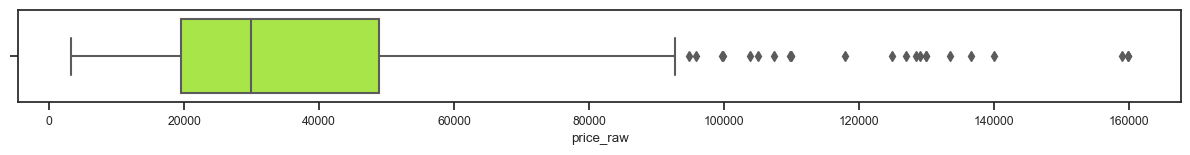

In [19]:
plt.figure(figsize=(15,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_filtered['price_raw'], color="greenyellow")

# Create Dataframe for Classification Model

In [20]:
df_model=df[['year_raw','ps_raw','gear_raw','fuel_raw','price_raw']]
print(df_model)

     year_raw  ps_raw       gear_raw fuel_raw  price_raw
2      2015.0     333        Automat   Benzin      29999
3      2010.0      90  Handschaltung   Diesel       7800
4      2017.0     190        Automat   Diesel      24500
5      2018.0     250        Automat   Benzin      37500
6      2016.0     180  Handschaltung   Benzin      17500
..        ...     ...            ...      ...        ...
745    2020.0     163        Automat   Diesel      44900
746    2015.0     190        Automat   Diesel      18900
747    2015.0      95  Handschaltung   Benzin      12900
748    2019.0     476        Automat   Benzin      79900
749    2016.0     449        Automat   Benzin      57900

[615 rows x 5 columns]


In [21]:
Handschaltung= pd.get_dummies(df_model['gear_raw'], drop_first=False)
Handschaltung[['Handschaltung', 'Automat']].head()

,Handschaltung,Automat
2,0,1
3,1,0
4,0,1
5,0,1
6,1,0


In [22]:
df_fuel=df[df["fuel_raw"].str.contains("Hybrid")==False]
Fuel= pd.get_dummies(df_fuel['fuel_raw'], drop_first=False)
Fuel[['Benzin', 'Diesel']].head()

,Benzin,Diesel
2,1,0
3,0,1
4,0,1
5,1,0
6,1,0


In [23]:
df_model['fuel_raw']=Fuel['Benzin']
df_model['gear_raw']=Handschaltung['Handschaltung']
df_model=df_model.dropna()
df_model=df_model.astype({'price_raw':'int'})
print(df_model)

     year_raw  ps_raw  gear_raw  fuel_raw  price_raw
2      2015.0     333         0       1.0      29999
3      2010.0      90         1       0.0       7800
4      2017.0     190         0       0.0      24500
5      2018.0     250         0       1.0      37500
6      2016.0     180         1       1.0      17500
..        ...     ...       ...       ...        ...
745    2020.0     163         0       0.0      44900
746    2015.0     190         0       0.0      18900
747    2015.0      95         1       1.0      12900
748    2019.0     476         0       1.0      79900
749    2016.0     449         0       1.0      57900

[579 rows x 5 columns]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_model[[ 'price_raw',
                                                                'fuel_raw',
                                                                'ps_raw',
                                                                'year_raw']], 
                                                                df_model['gear_raw'], 
                                                                test_size=0.20, 
                                                                random_state=42)
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
     price_raw  fuel_raw  ps_raw  year_raw
117      26900       0.0     170    2018.0
710      14900       0.0     184    2011.0
163      42900       0.0     313    2017.0
460      25900       0.0     136    2017.0
414      12980       1.0      99    2014.0 

y_train:
117    0
710    0
163    0
460    0
414    0
Name: gear_raw, dtype: uint8


In [25]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=20, 
                             max_depth=3)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0], dtype=uint8)

# Confusion Matrix

In [26]:
print(confusion_matrix(y_test, y_pred), '\n')




[[82  9]
 [10 15]] 



# 'Classification report'

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        91
           1       0.62      0.60      0.61        25

    accuracy                           0.84       116
   macro avg       0.76      0.75      0.75       116
weighted avg       0.83      0.84      0.83       116



# Textbased Classification Tree

In [28]:
text_rep = tree.export_text(clf, 
                            feature_names=list(X_train.columns))
print(text_rep)



|--- price_raw <= 17885.00
|   |--- ps_raw <= 161.50
|   |   |--- price_raw <= 4749.50
|   |   |   |--- class: 1
|   |   |--- price_raw >  4749.50
|   |   |   |--- class: 1
|   |--- ps_raw >  161.50
|   |   |--- price_raw <= 10900.00
|   |   |   |--- class: 1
|   |   |--- price_raw >  10900.00
|   |   |   |--- class: 0
|--- price_raw >  17885.00
|   |--- year_raw <= 1998.50
|   |   |--- ps_raw <= 140.00
|   |   |   |--- class: 1
|   |   |--- ps_raw >  140.00
|   |   |   |--- class: 0
|   |--- year_raw >  1998.50
|   |   |--- ps_raw <= 163.50
|   |   |   |--- class: 0
|   |   |--- ps_raw >  163.50
|   |   |   |--- class: 0



# Classification Tree

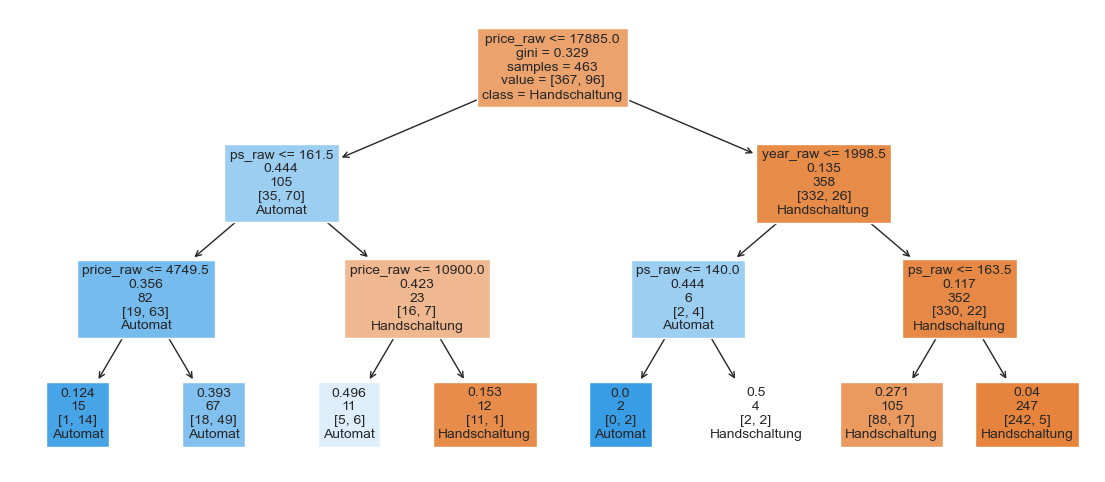

In [29]:

fig = plt.figure(figsize=(14,6))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['Handschaltung', 'Automat'],
                   filled=True,
                   fontsize=10,
                   label='root')



Cars with more ps


# Random forest classifier

In [30]:
# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(df_model[[ 'price_raw',
                                                                'fuel_raw',
                                                                'ps_raw',
                                                                'year_raw']], 
                                                        df_model['gear_raw'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=20, max_depth=10)

# Train the random forest classifier
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable (0 = not survived, 1 = survived)
y_pred_rf = rfc.predict(X2_test)

print('Predicted target variable (0 = not survived, 1 = survived)')
y_pred_rf


X2_train:
     price_raw  fuel_raw  ps_raw  year_raw
117      26900       0.0     170    2018.0
710      14900       0.0     184    2011.0
163      42900       0.0     313    2017.0
460      25900       0.0     136    2017.0
414      12980       1.0      99    2014.0 

y2_train:
117    0
710    0
163    0
460    0
414    0
Name: gear_raw, dtype: uint8
Predicted target variable (0 = not survived, 1 = survived)


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=uint8)

# Feature importance

Index(['price_raw', 'ps_raw', 'year_raw', 'fuel_raw'], dtype='object')
[0.50547434 0.29167823 0.17446415 0.02838327]


<AxesSubplot: ylabel='features'>

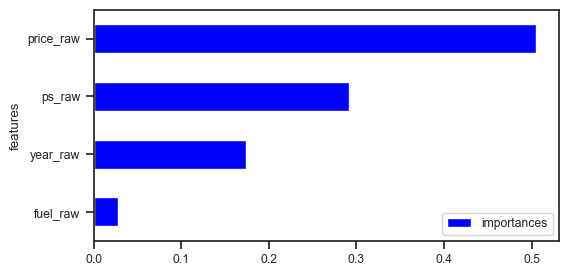

In [31]:
cols = X2_train.columns
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print( cols[indices] )
print( importances[indices] )
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='blue', 
           figsize=(6,3))



# Roc Curve and AOC

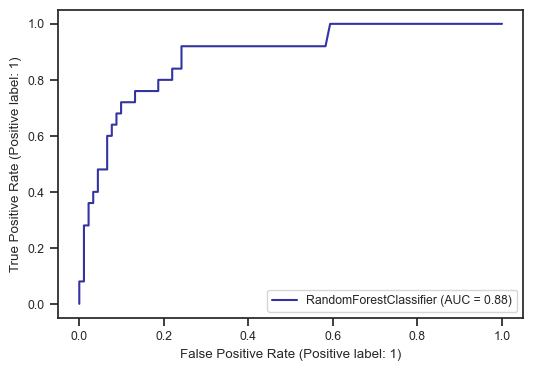

In [32]:
plt.figure(figsize=(6,4))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X_test, 
                                          y_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkblue")
plt.show()

# Create contingency table with the number of cars fueled by gas, diesel or electric versus price

In [33]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

df.drop(df[(df['fuel_raw'] == "Erdgas (CNG) / Benzin") ].index, inplace=True)
df.drop(df[(df['fuel_raw'] == "Mild-Hybrid Benzin/Elektro") ].index, inplace=True)
df.drop(df[(df['fuel_raw'] == "Mild-Hybrid Diesel/Elektro") ].index, inplace=True)
df.drop(df[(df['fuel_raw'] == "Plug-in-Hybrid Benzin/Elektro") ].index, inplace=True)
df.drop(df[(df['fuel_raw'] == "Voll-Hybrid Benzin/Elektro") ].index, inplace=True)
df.drop(df[(df['fuel_raw'] == "grau") ].index, inplace=True)
df.drop(df[(df['fuel_raw'] == "rot") ].index, inplace=True)
df.drop(df[(df['fuel_raw'] == "schwarz") ].index, inplace=True)
df.drop(df[(df['fuel_raw'] == "weiss") ].index, inplace=True)

In [34]:
# Create new categorical variable 'price_cat'
# Create labels
labels = ['0 - 4999', '5000 - 9999', '10000 - 14999', '15000 - 19999', '20000 - 29999', '30000-  39999', '40000 - 59999', '60000 - 79999', '>80000']

# Create new categorical variable
df["price_cat"] = pd.cut(df['price_raw'], bins=[0, 5000, 10000, 15000, 20000, 30000, 40000, 60000, 80000, 170000], labels=labels)

# Check values
df[['price_raw', 'price_cat']].head(10)

,price_raw,price_cat
2,29999,20000 - 29999
3,7800,5000 - 9999
4,24500,20000 - 29999
5,37500,30000- 39999
6,17500,15000 - 19999
8,2900,0 - 4999
10,42730,40000 - 59999
15,20900,20000 - 29999
16,18900,15000 - 19999
17,17900,15000 - 19999


In [35]:
# Contingency table (numbers in the table are apartments)
tab = pd.pivot_table(df[['web-scraper-order','fuel_raw', 'price_cat']],
                     index=['fuel_raw'],
                     columns=['price_cat'], 
                     aggfunc='count')
tab

web-scraper-order                                          \
price_cat          0 - 4999 5000 - 9999 10000 - 14999 15000 - 19999   
fuel_raw                                                              
Benzin                   15          28            30            38   
Diesel                    4          11            17            23   
Elektro                   0           0             0             0   

                                                                          
price_cat 20000 - 29999 30000-  39999 40000 - 59999 60000 - 79999 >80000  
fuel_raw                                                                  
Benzin               77            47            56            21     25  
Diesel               51            34            32            17      5  
Elektro               3             5             7            12      3

In [36]:
#Select part of the contingency table
tab_sub = tab.iloc[0:3,3:7]
tab_sub

web-scraper-order                                          
price_cat     15000 - 19999 20000 - 29999 30000-  39999 40000 - 59999
fuel_raw                                                             
Benzin                   38            77            47            56
Diesel                   23            51            34            32
Elektro                   0             3             5             7

# Perform Chi-square test

In [37]:
# 1-alpha
prob = 0.95

# Chi-squared test
stat, p, dof, expected = chi2_contingency(tab_sub)

# Critical value
critical = chi2.ppf(prob, dof)

# Print results of the Chi-square test
print('Expected frequencies:', '\n', expected.round(4), '\n')
print('Critical value:', critical.round(4), '\n')
print('Test statistic:', stat.round(4), '\n')
print('Degrees of freedom:', dof, '\n')
print(f'p-value: {p:.4f}')

Expected frequencies: 
 [[35.6515 76.563  50.2627 55.5228]
 [22.8954 49.1689 32.2788 35.6568]
 [ 2.4531  5.2681  3.4584  3.8204]] 

Critical value: 12.5916 

Test statistic: 7.6716 

Degrees of freedom: 6 

p-value: 0.2632


In [38]:
# Evaluation:
# Because the test statistic is smaller than the critical value and the p-value is larger than 0.05, 
# we cannot reject the null hypothesis, i.e. there is no statistically siginificant (5% significance-level) difference 
# in the number of apartments on the market for the selected area- and price categories. 
#This means that the observed difference could have occurred by chance and is not statistically reliable.